# Questão 1

Seja a base de dados [Gapminder](https://www.gapminder.org/data/). Tomando-se uma série amostral qualquer (buscar por “Choose individual indicators”), deve-se:

a) Caracterizar a amostra, inclusive graficamente;

b) Com base no modelo Gaussiano e em um segundo (à escolha), verificar sua aderência
à série de dados, usando o teste de Kolmogorov-Smirnov. Deve-se implementar o
teste, sendo desejável validar a implementação com base em rotina disponível numa
ferramenta de análise matemática ou linguagem de programação qualquer. 

## Item a)

### Leitura e filtragem dos dados

Os dados escolhidos da base de dados [Gapminder](https://www.gapminder.org/data/) foram os de expectativas de vida.

Optou-se por trabalhar com os dados somente do Brasil, no período de 1970 à 2019. Sendo assim, antes de calcular os parâmetros e gerar os gráficos para caracterização da amostra, é necessário filtrar os dados obtidos.

Neste item, utilizou-se a linguagem de programação [Python](https://www.python.org/) e para efetuar a leitura e filtragem dos dados utilizou-se a famosa biblioteca [Pandas](https://pandas.pydata.org/).

A leitura dos dados do arquivo `lex.csv` é feita pelo trecho do código abaixo.

In [43]:
# | code-fold: false
import pandas as pd

df = pd.read_csv("lex.csv")
df

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2091,2092,2093,2094,2095,2096,2097,2098,2099,2100
0,Afghanistan,28.2,28.2,28.2,28.2,28.2,28.2,28.1,28.1,28.1,...,75.5,75.7,75.8,76.0,76.1,76.2,76.4,76.5,76.6,76.8
1,Angola,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,27.0,...,78.8,79.0,79.1,79.2,79.3,79.5,79.6,79.7,79.9,80.0
2,Albania,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,35.4,...,87.4,87.5,87.6,87.7,87.8,87.9,88.0,88.2,88.3,88.4
3,Andorra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UAE,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,30.7,...,82.4,82.5,82.6,82.7,82.8,82.9,83.0,83.1,83.2,83.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Samoa,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,25.4,...,79.8,79.9,80.0,80.1,80.3,80.4,80.5,80.6,80.7,80.8
191,Yemen,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,23.4,...,76.9,77.0,77.1,77.3,77.4,77.5,77.6,77.8,77.9,78.0
192,South Africa,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,33.5,...,76.4,76.5,76.7,76.8,77.0,77.1,77.3,77.4,77.5,77.7
193,Zambia,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,32.6,...,75.8,76.0,76.1,76.3,76.4,76.5,76.7,76.8,77.0,77.1


Como foi dito acima, trabalharemos com os dados somente do Brasil, no período de 1970 a 2019. No trecho de código abaixo são apresentadas as instruções para as filtragens necessárias e também manipulações com as estruturas de dados da biblioteca `pandas` para facilitar os trabalhos posteriores. Após o trecho de código, uma tabela com os dados filtrados é apresentada.

In [44]:
# | code-fold: false
START_YEAR = 1970
END_YEAR = 2019

brazil_life_expectancy_serie = (
    df[(df.country == "Brazil")]
    .drop(columns="country")
    .reset_index(drop=True)
    .squeeze()
    .rename("Brazil Life Expectancy")
)

df_brazil_life_expectancy = pd.DataFrame(brazil_life_expectancy_serie)
df_brazil_life_expectancy.index = df_brazil_life_expectancy.index.astype(int)
df_brazil_life_expectancy.index.names = ["Year"]
df_brazil_life_expectancy = df_brazil_life_expectancy.loc[START_YEAR:END_YEAR]
df_brazil_life_expectancy

,Brazil Life Expectancy
Year,
1970,56.9
1971,57.5
1972,58.0
1973,58.6
1974,59.2
1975,59.8
1976,60.4
1977,61.1
1978,61.7


### Caracterização da amostra

#### Média ($\bar{x}$)

A média de uma amostra é dada pela @eq-media.

$$
\bar{x} = \dfrac{1}{n} \sum_{i=1}^{n} x_{i}
$$ {#eq-media}

No trecho de código abaixo é apresentada uma possível implementação para obter a média dos dados selecionados.

In [45]:
# | code-fold: false
mean = df_brazil_life_expectancy["Brazil Life Expectancy"].sum() / len(
    df_brazil_life_expectancy
)
mean

68.12200000000001

Portanto, a média da amostra selecionada é de **68,122 anos**.

#### Variância ($s^{2}$)

A variância de uma amostra pode ser calculada pela @eq-variancia.

$$
s^{2} = \dfrac{1}{n-1} \sum_{i=1}^{n} \left ( x_{i} - \bar{x} \right)^{2}
$$ {#eq-variancia}

No trecho de código abaixo é apresentada uma possível implementação para obter a variância da amostra.

In [46]:
# | code-fold: false
variance = df_brazil_life_expectancy["Brazil Life Expectancy"].apply(
    lambda x: (x - mean) ** 2
).sum() / (len(df_brazil_life_expectancy) - 1)
variance

32.15522040816326

Portanto, a variância da amostra é de **32,155 anos²**.

#### Desvio padrão ($s$)

O desvio padrão da amostra é calculado por meio da extração da raiz quadrada da variância, como expresso pela @eq-std.

$$
s = \sqrt{\dfrac{1}{n-1} \sum_{i=1}^{n} \left ( x_{i} - \bar{x} \right)^{2}}
$$ {#eq-std}

Calculando o desvio padrão

In [47]:
#| code-fold: false
standard_deviation = variance ** 0.5
standard_deviation

5.670557327826186

Logo, o desvio padrão da amostra é de **5,6706 anos**.

#### Coeficiente de variação ($COV$)

O coeficiente de variação é calculado por meio da @eq-cov.

$$
COV = \dfrac{s}{\bar{x}}
$$ {#eq-cov}

In [48]:
#| code-fold: false
COV = standard_deviation / mean
COV

0.0832412044247994

Portanto, o coeficiente de variação da amostra é de **8,324%**.

#### Máximo e mínimo

Os anos em que se observaram as máximas e mínimas expectativas de vida são facilmente obtidos com a biblioteca `pandas`, conforme é mostrado abaixo.

In [49]:
# | code-fold: false
max_expectancy = df_brazil_life_expectancy[
    df_brazil_life_expectancy["Brazil Life Expectancy"]
    == df_brazil_life_expectancy["Brazil Life Expectancy"].max()
]
max_expectancy

,Brazil Life Expectancy
Year,
2019,75.8


In [50]:
# | code-fold: false
min_expectancy = df_brazil_life_expectancy[
    df_brazil_life_expectancy["Brazil Life Expectancy"]
    == df_brazil_life_expectancy["Brazil Life Expectancy"].min()
]
min_expectancy

,Brazil Life Expectancy
Year,
1970,56.9


#### Quantis

Os quantis são pontos que dividem os dados ordenados em subconjuntos de dados de dimensão igual.

Alguns quantis específicos são denominados de forma especial, como os 100-quantis, conhecidos como **percentis**.

Os percentis 25, 50 e 75 são chamados **quartis** e o percentil 50 é também conhecido como a **mediana** da amostra.

O trecho de código abaixo contém uma implementação para o cálculo da mediana da amostra.

In [51]:
#| code-fold: false
def calculate_median(data: pd.Series):
    data = data.sort_values()
    n = len(data)
    if n % 2 == 0:
        return (data.iloc[n // 2] + data.iloc[n // 2 - 1]) / 2
    else:
        return data.iloc[n // 2]

calculate_median(df_brazil_life_expectancy["Brazil Life Expectancy"])

69.0

Portanto, a mediana é de **69,0 anos**.

A biblioteca `pandas` permite obter os valores dos quantis desejados de forma prática utilizando o método `quantile()`, como é mostrado abaixo.

In [52]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.25)

63.949999999999996

In [53]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.50) # median

69.0

In [54]:
#| code-fold: false
df_brazil_life_expectancy["Brazil Life Expectancy"].quantile(0.75)

73.25

Alguns dos parâmetros da amostra podem ser obtidos também de forma resumida e imediata com o uso do método `describe()`.

In [55]:
# | code-fold: false
df_brazil_life_expectancy.describe()

,Brazil Life Expectancy
count,50.000000
mean,68.122000
std,5.670557
min,56.900000
25%,63.950000
50%,69.000000
75%,73.250000
max,75.800000


### Visualização gráfica

#### Box plot

O *box plot* é uma representação gráfica que utiliza os quartis e os valores mínimo e máximo para representar a distribuição de dados quantitativos.

Para a amostra que estamos trabalhando, um *box plot* é apresentado na @fig-box-plot. Na construção desse e de outros gráficos neste trabalho, a biblioteca utilizada foi a [Seaborn](https://seaborn.pydata.org/).

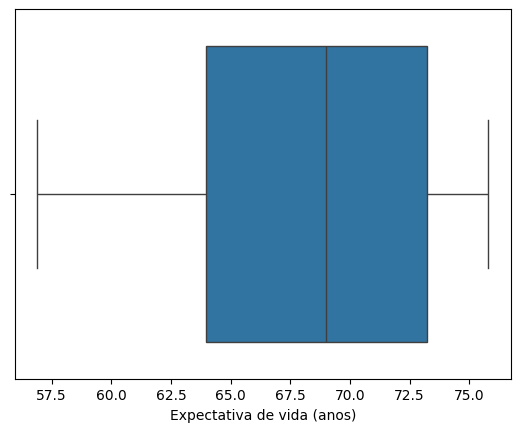

In [56]:
#| label: fig-box-plot
#| fig-cap: "Box plot da expectativa de vida no Brasil."

import seaborn as sns

fig = sns.boxplot(x=df_brazil_life_expectancy["Brazil Life Expectancy"])
fig.set_xlabel("Expectativa de vida (anos)");

#### Violin plot

O *violin plot* é uma junção do *box plot* com um gráfico chamado *kernel density plot* e é frequentemente utilizado para visualizar a distribuição de dados de uma amostra.

Na @fig-violin-plot é possível observar esse gráfico para os dados em que estamos trabalhando.

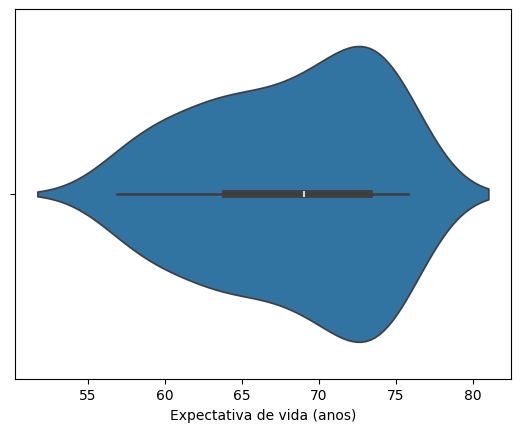

In [57]:
#| label: fig-violin-plot
#| fig-cap: "Violin plot da expectativa de vida no Brasil."

fig = sns.violinplot(x=df_brazil_life_expectancy["Brazil Life Expectancy"])
fig.set_xlabel("Expectativa de vida (anos)");

#### Histograma de ocorrências

Como temos uma amostra de tamanho maior do que 30 valores, para calcular a quantidade de intervalos para o histograma ($k$), podemos utilizar a fórmula de Sturges (@eq-sturges).

$$
k = \log_{2} \left ( n \right ) + 1
$$ {#eq-sturges}

em que $n$ é o tamanho da amostra. Logo, utilizando a biblioteca [NumPy](https://numpy.org/) para calcular o logaritmo, obtemos:

In [58]:
#| code-fold: false

import numpy as np

k = np.log2(len(df_brazil_life_expectancy)) + 1
k

6.643856189774724

Adotaremos então 7 intervalos para construirmos os histogramas dos dados.

Um histograma de ocorrências dos dados é apresentado na @fig-hist-ocorrencias.

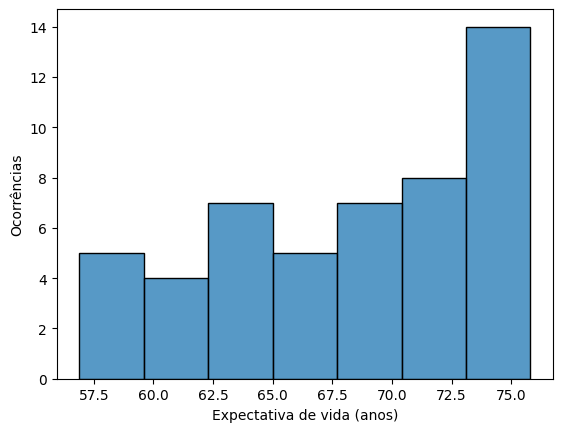

In [59]:
# | label: fig-hist-ocorrencias
# | fig-cap: "Histograma de ocorrências da expectativa de vida no Brasil."

N_BINS = 7

fig = sns.histplot(
    data=df_brazil_life_expectancy, x="Brazil Life Expectancy", bins=N_BINS
)
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Ocorrências");

#### Histograma de frequências relativas

Um histograma de frequências relativas é apresentado na @fig-hist-frelativas.

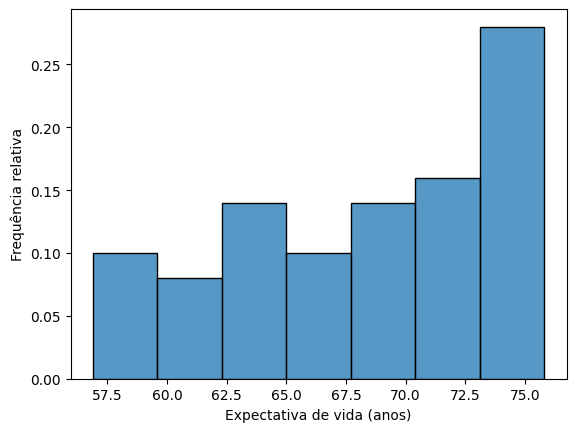

In [60]:
# | label: fig-hist-frelativas
# | fig-cap: "Histograma de frequências relativas da expectativa de vida no Brasil."

fig = sns.histplot(
    data=df_brazil_life_expectancy,
    x="Brazil Life Expectancy",
    bins=N_BINS,
    stat="probability",
)
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Frequência relativa");

#### Histograma de densidade de probabilidade

Um histograma de densidade de probabilidade é apresentado na @fig-hist-density-prob.

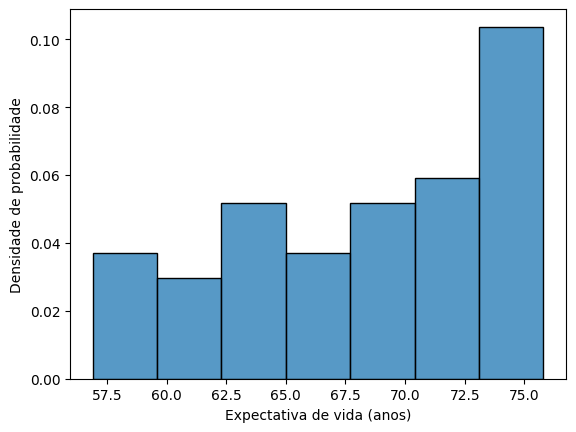

In [61]:
#| label: fig-hist-density-prob
#| fig-cap: "Histograma de densidade de probabilidade da expectativa de vida no Brasil."

fig = sns.histplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy", bins=N_BINS, stat="density")
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Densidade de probabilidade");

#### Histograma cumulativo das observações

Um histograma cumulativo das observações é apresentado na @fig-hist-cumulativo-obs.

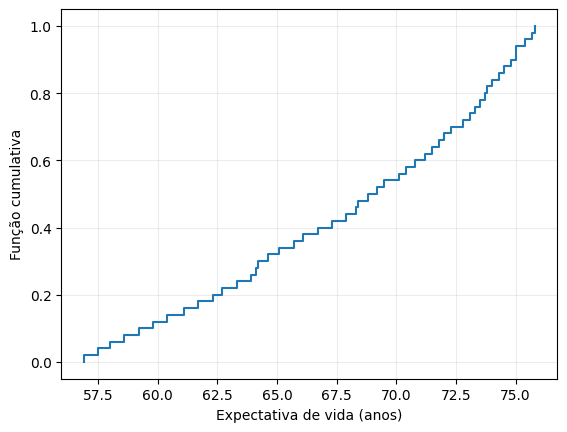

In [62]:
#| label: fig-hist-cumulativo-obs
#| fig-cap: "Histograma cumulativo das observações da expectativa de vida no Brasil."

fig = sns.ecdfplot(data=df_brazil_life_expectancy, x="Brazil Life Expectancy")
fig.set_ylim(-0.05, 1.05)
fig.set_xlabel("Expectativa de vida (anos)")
fig.set_ylabel("Função cumulativa");
fig.grid(True, color="gray", alpha=0.15)


## Item b)

Para implementar o teste de Kolmogorov-Smirnov, precisaremos da função de distribuição acumulada empírica ($ECDF$) dos dados trabalhados.

Para obtê-la, iremos fazer uso da biblioteca [SciPy](https://scipy.org/), que possui um módulo com diversas funções estatísticas. No trecho de código abaixo, é feita a implementação para obter a função de distribuição acumulada empírica.

In [63]:
#| code-fold: false
import scipy.stats as ss

ECDF = ss.ecdf(df_brazil_life_expectancy["Brazil Life Expectancy"]).cdf

O teste de Kolmogorov-Smirnov calcula a máxima distância entre a função cumulativa de probabilidade do modelo hipotético ($F_{X}$) parametrizado e o histograma cumulativo da amostra dado pela ($ECDF$).

Esse teste é matematicamente expresso pela @eq-kstest.

$$
ks = \max \left \{ \left | ECDF_{i} - F_{X}(x_{i}) \right | \right \}
$$ {#eq-kstest}

No trecho de código abaixo são apresentadas funções que automatizam os cálculos para o teste de Kolmogorov-Smirnov e a geração de gráficos comparativos das funções de distribuição acumulada.

Para realizar a composição de gráficos, a biblioteca [Matplotlib](https://matplotlib.org/) foi utilizada.

In [64]:
# | code-fold: false

import matplotlib.pyplot as plt


def calculate_ks_test(data: pd.Series, ecdf, distribution, loc, scale):
    min_value = data.min()
    max_value = data.max()
    step = (max_value - min_value) / 1e5

    x_range = np.arange(min_value, max_value + step, step)

    ks_test_value = 0
    x_ks_test = min_value

    for xi in x_range:
        ks = abs(ecdf.evaluate(xi) - distribution.cdf(xi, loc=loc, scale=scale))
        if ks > ks_test_value:
            ks_test_value = ks
            x_ks_test = xi

    return ks_test_value, x_ks_test


def plot_ks_test(
    ecdf, distribution, loc, scale, x_ks_value, ks_test_value, save=False, xytext=None
):
    fig, ax = plt.subplots()
    x_plot = np.linspace(
        distribution.ppf(0.001, loc=loc, scale=scale),
        distribution.ppf(0.999, loc=loc, scale=scale),
        1000,
    )
    ax.plot(x_plot, distribution.cdf(x_plot, loc=loc, scale=scale), label="CDF")
    ecdf.plot(ax=ax, label="ECDF (Empírica)")
    ax.plot(
        [x_ks_value, x_ks_value],
        [
            distribution.cdf(x_ks_value, loc=loc, scale=scale),
            ecdf.evaluate(x_ks_value),
        ],
        "k+-",
    )
    ax.set_xlabel("Expectativa de vida (anos)")
    ax.set_ylabel("Função cumulativa")
    ax.legend(loc="best")
    ax.annotate(
        f"ks = {ks_test_value:.5f}",
        (x_ks_value, ecdf.evaluate(x_ks_value) + 0.05),
        xytext=(x_ks_value + 1, ecdf.evaluate(x_ks_value) + 0.05)
        if xytext is None
        else xytext,
    )
    ax.grid(True, color="gray", alpha=0.15)
    if save:
        fig.savefig("ks-test.pdf", bbox_inches="tight")

### Modelo Gaussiano

Para o modelo Gaussiano, as estimativas de $E(X)$ e de $Var(X)$ são a média amostral ($\bar{x}$) e variância amostral ($s^{2}$). Os parâmetros `loc` e `scale` utilizados para essa distribuição são a média amostral e desvio padrão amostral.

O trecho de código para efetuar os cálculos do teste de Kolmogorov-Smirnov é apresentado abaixo.

In [65]:
# | code-fold: false

ks_test_value_gauss, x_ks_test_gauss = calculate_ks_test(
    df_brazil_life_expectancy["Brazil Life Expectancy"],
    ECDF,
    ss.norm,
    mean,
    standard_deviation,
)
ks_test_value_gauss, x_ks_test_gauss

(0.10636323684719218, 71.1999289999156)

Portanto, o valor do teste de Kolmogorov-Smirnov obtido pela implementação desenvolvida foi **0,10636** e foi encontrado para o valor de **71,2 anos**.

Na @fig-ks-gauss é apresentada uma representação gráfica do teste, com a indicação do valor obtido e posição no gráfico.

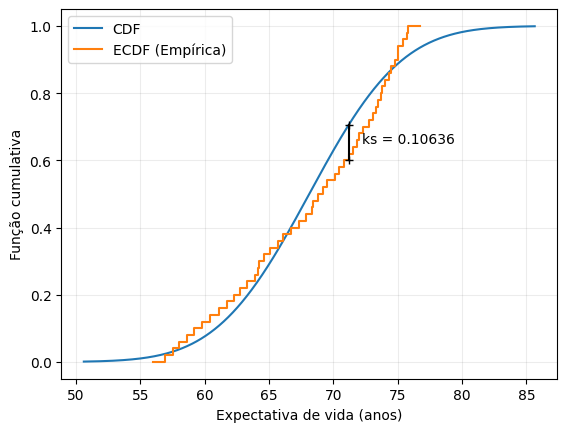

In [66]:
# | label: fig-ks-gauss
# | fig-cap: "Teste de Kolmogorov-Smirnov para a distribuição normal."

plot_ks_test(
    ECDF, ss.norm, mean, standard_deviation, x_ks_test_gauss, ks_test_value_gauss
)

Para validar o resultado obtido, foi realizado no trecho de código abaixo o teste de Kolmogorov-Smirnov por meio da função `kstest` da biblioteca [SciPy](https://scipy.org/).

In [67]:
# | code-fold: false
ks_res_gauss = ss.kstest(
    df_brazil_life_expectancy["Brazil Life Expectancy"],
    "norm",
    args=(mean, standard_deviation),
)
ks_res_gauss

KstestResult(statistic=0.10636754772067303, pvalue=0.5863628686773552, statistic_location=71.2, statistic_sign=-1)

Na tabela abaixo é apresentado um resumo dos resultados.

In [68]:
df_ks_gauss = pd.DataFrame(
    [
        {"ks": ks_test_value_gauss, "Location": x_ks_test_gauss},
        {"ks": ks_res_gauss.statistic, "Location": ks_res_gauss.statistic_location},
    ]
)
df_ks_gauss.index = ["Manual", "Scipy"]
df_ks_gauss

,ks,Location
Manual,0.106363,71.199929
Scipy,0.106368,71.200000


Portanto, nota-se que o resultado obtido pela implementação apresentada foi muito próximo do resultado da função `kstest`.

### Distribuição de Gumbel (inclinada para a esquerda)

Para obter os parâmetros `loc` e `scale` para essa distribuição, utilizaremos o método `fit()`.

In [69]:
# | code-fold: false

loc_gumbel_l, scale_gumbel_l = ss.gumbel_l.fit(
    df_brazil_life_expectancy["Brazil Life Expectancy"]
)
loc_gumbel_l, scale_gumbel_l

(70.79722473205372, 4.545126232797063)

Tendo os parâmetros, utilizaremos nossa função para calcular o valor do teste de Kolmogorov-Smirnov.

In [70]:
# | code-fold: false

ks_test_value_gumbel_l, x_ks_test_gumbel_l = calculate_ks_test(
    df_brazil_life_expectancy["Brazil Life Expectancy"],
    ECDF,
    ss.gumbel_l,
    loc_gumbel_l,
    scale_gumbel_l,
)
ks_test_value_gumbel_l, x_ks_test_gumbel_l

(0.09432013451387156, 64.60004899995455)

Portanto, o valor da estatística KS para essa distribuição foi **0,09432** para o valor de **64,6 anos**.

Na @fig-ks-gumbel-l é apresentada uma representação gráfica do teste, com a indicação do valor obtido e posição no gráfico.

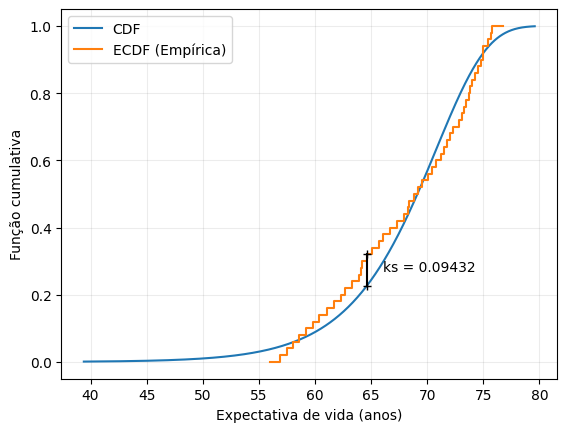

In [71]:
# | label: fig-ks-gumbel-l
# | fig-cap: "Teste de Kolmogorov-Smirnov para a distribuição Gumbel à esquerda."

plot_ks_test(
    ECDF,
    ss.gumbel_l,
    loc_gumbel_l,
    scale_gumbel_l,
    x_ks_test_gumbel_l,
    ks_test_value_gumbel_l,
    xytext=(x_ks_test_gumbel_l + 1.5, ECDF.evaluate(x_ks_test_gumbel_l) - 0.05),
)

Novamente, para validação, utilizaremos a função `kstest`:

In [72]:
# | code-fold: false

ks_res_gumbel_l = ss.kstest(
    df_brazil_life_expectancy["Brazil Life Expectancy"],
    "gumbel_l",
    args=(loc_gumbel_l, scale_gumbel_l),
)
ks_res_gumbel_l

KstestResult(statistic=0.09432226961248374, pvalue=0.7297138491145043, statistic_location=64.6, statistic_sign=1)

A tabela abaixo contém o resumo dos resultados.

In [73]:
df_ks_gumbel_l = pd.DataFrame(
    [
        {"ks": ks_test_value_gumbel_l, "Location": x_ks_test_gumbel_l},
        {
            "ks": ks_res_gumbel_l.statistic,
            "Location": ks_res_gumbel_l.statistic_location,
        },
    ]
)
df_ks_gumbel_l.index = ["Manual", "Scipy"]
df_ks_gumbel_l

,ks,Location
Manual,0.094320,64.600049
Scipy,0.094322,64.600000


Novamente percebe-se que o resultado obtido pela implementação apresentada foi muito próximo do resultado da função `kstest`.

### Teste de hipótese

Para obter o valor de KS crítico, adotaremos o nível de significância ($\alpha$) de **5%** e, portanto, a @eq-kscritico.

$$
KS_{crítico} = \dfrac{1{,}36}{\sqrt{n}}
$$ {#eq-kscritico}

In [74]:
#| code-fold: false
ks_critical = 1.36 / (len(df_brazil_life_expectancy) ** 0.5)
ks_critical

0.19233304448274094

Na tabela abaixo comparamos os valores da estatística KS obtidos com o crítico.

In [75]:
df_ks_comparison = pd.DataFrame(
    [ks_test_value_gauss, ks_test_value_gumbel_l, ks_critical],
    index=["Gaussiano", "Gumbel_l", "Crítico"],
    columns=["ks"],
)
df_ks_comparison

,ks
Gaussiano,0.106363
Gumbel_l,0.094320
Crítico,0.192333


Portanto, houve aderência para os dois modelos testados.

Na @fig-cdfs e @fig-pdfs são apresentados os gráficos das CDFs e PDFs das distribuições analisadas, respectivamente.

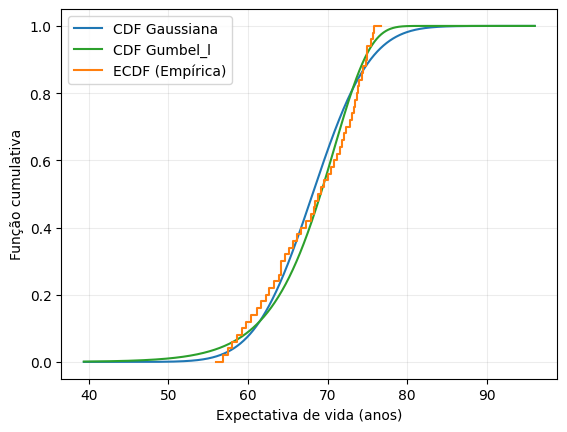

In [76]:
#| label: fig-cdfs
#| fig-cap: "CDFs das distribuições testadas e CDF empírica da expectativa de vida no Brasil."

fig, ax = plt.subplots()
x_plot = np.linspace(
    ss.gumbel_l.ppf(0.001, loc=loc_gumbel_l, scale=scale_gumbel_l),
    # ss.gumbel_l.ppf(0.999, loc=loc_gumbel_l, scale=scale_gumbel_l),
    96,
    1000,
)
ax.plot(
    x_plot,
    ss.norm.cdf(x_plot, loc=mean, scale=standard_deviation),
    label="CDF Gaussiana",
)
ax.plot(
    x_plot,
    ss.gumbel_l.cdf(x_plot, loc=loc_gumbel_l, scale=scale_gumbel_l),
    label="CDF Gumbel_l",
    color="#2ca02c",
)
ECDF.plot(ax=ax, label="ECDF (Empírica)")
ax.set_xlabel("Expectativa de vida (anos)")
ax.set_ylabel("Função cumulativa")
ax.legend(loc="best")
ax.grid(True, color="gray", alpha=0.15)

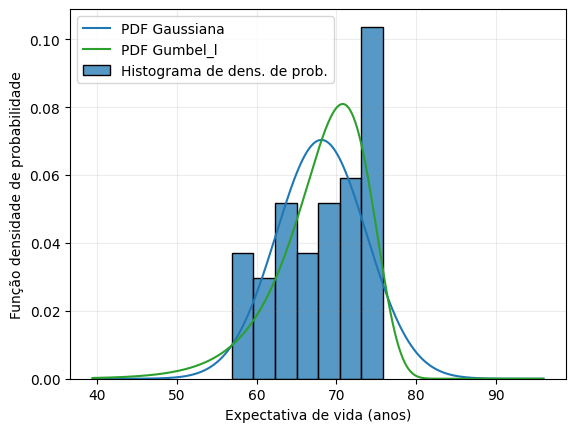

In [77]:
#| label: fig-pdfs
#| fig-cap: "PDFs das distribuições testadas e histograma de densidade de probabilidade da expectativa de vida no Brasil."

fig, ax = plt.subplots()
x_plot = np.linspace(
    ss.gumbel_l.ppf(0.001, loc=loc_gumbel_l, scale=scale_gumbel_l),
    # ss.gumbel_l.ppf(0.999, loc=loc_gumbel_l, scale=scale_gumbel_l),
    96,
    1000,
)
ax.plot(
    x_plot,
    ss.norm.pdf(x_plot, loc=mean, scale=standard_deviation),
    label="PDF Gaussiana",
)
ax.plot(
    x_plot,
    ss.gumbel_l.pdf(x_plot, loc=loc_gumbel_l, scale=scale_gumbel_l),
    label="PDF Gumbel_l",
    color="#2ca02c",
)
sns.histplot(
    data=df_brazil_life_expectancy,
    x="Brazil Life Expectancy",
    bins=N_BINS,
    stat="density",
    label="Histograma de dens. de prob.",
    ax=ax,
)
ax.set_xlabel("Expectativa de vida (anos)")
ax.set_ylabel("Função densidade de probabilidade")
ax.legend(loc="best")
ax.grid(True, color="gray", alpha=0.15)

# Questão 2

Seja a treliça isostática representada a seguir. As barras são tubulares, com diâmetro externo e espessura iguais a $D = 50\, \textrm{mm}$ e $t = 5\, \textrm{mm}$, respectivamente. Com base no Princípio dos Trabalhos Virtuais, ou método equivalente, obter a equação do deslocamento vertical no ponto C ($\delta_{C}$).

![](./images/Imagem1.png)

Admita-se que as forças $P$ e $Q$, e o módulo de elasticidade do aço ($E$) são variáveis aleatórias (v.a.) no processo (vide Tabela 1). Ainda que não se possa definir de forma exata o modelo estatístico que rege a v.a. $\delta_{C}$, pode-se inferir a respeito de sua distribuição com base em simulação. Assim, deve-se gerar séries de números randômicos para E, P e Q, obtendo-se uma série de dados simulados para $\delta_{C}$. Com base na análise de seu histograma e em um teste de aderência à escolha, deve-se verificar se os dados de $\delta_{C}$ são originados do modelo Lognormal.

Tabela 1 - Descrição estatística das v.a. do problema

| **Variável** | **Média** | **COV** | **Distribuição** |
|--------------|-----------|---------|------------------|
| $E$ (GPa)    | 205       | 0,05    | Normal           |
| $P$ (kN)     | 60        | 0,1     | Normal           |
| $Q$ (kN)     | 40        | 0,1     | Normal           |

## Resolução

### Expressão do deslocamento vertical no ponto C ($\delta_{C}$)

No arquivo `trelica_q2.pdf` é realizada a aplicação do Princípio dos Trabalhos Virtuais na treliça para o cálculo da expressão do deslocamento vertical no Ponto C, dada pela @eq-delta-c.

$$
\delta_{C} = \dfrac{4P + 14Q + 4 \sqrt{2} (P + 2Q)}{EA} 
$$ {#eq-delta-c}

### Inferência sobre a distribuição do deslocamento

Para inferir sobre a distribuição do deslocamento, foram gerados 50000 pontos randomicamente baseados nas distribuições da Tabela 1 para $E$, $P$ e $Q$. Para isso, foi utilizada a linguagem [Python](https://python.org/) e a biblioteca [NumPy](https://numpy.org), conforme é apresentado no código abaixo.

In [78]:
#| code-fold: false


import numpy as np

SIZE = 50_000
np.random.seed(0)

mu_E = 205.0e9  # Pa
COV_E = 0.05
sigma_E = COV_E * mu_E

mu_P = 60.0e3  # N
COV_P = 0.1
sigma_P = COV_P * mu_P

mu_Q = 40.0e3  # N
COV_Q = 0.1
sigma_Q = COV_Q * mu_Q

De = 50e-3  # m
t = 5e-3  # m
A = np.pi * (De**2 - (De - 2 * t) ** 2) / 4  # m^2


def calc_delta_C(P, Q, E, A):
    return (4 * P + 14 * Q + 4 * np.sqrt(2) * (P + 2 * Q)) / (E * A)


E_values = np.random.normal(mu_E, sigma_E, SIZE)
P_values = np.random.normal(mu_P, sigma_P, SIZE)
Q_values = np.random.normal(mu_Q, sigma_Q, SIZE)

delta_C_values = calc_delta_C(P_values, Q_values, E_values, A) * 1E2  # cm

Um histograma de densidade de probabilidade é apresentado na @fig-hist-q2. A construção desse histograma foi feita por meio da biblioteca [Seaborn](https://seaborn.pydata.org/).

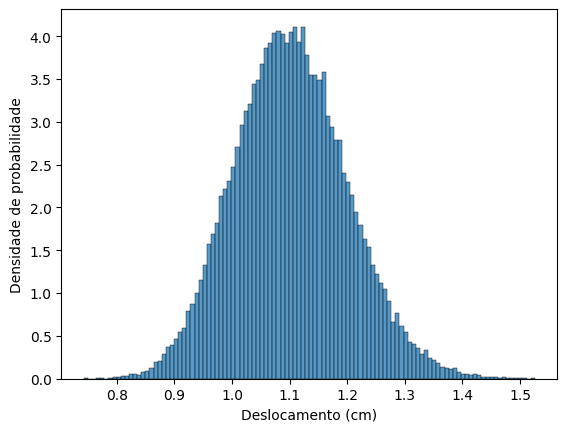

In [79]:
#| label: fig-hist-q2
#| fig-cap: Histograma de densidade de probabilidade do deslocamento vertical no ponto C.

import seaborn as sns


fig = sns.histplot(data=delta_C_values, stat="density")
fig.set_xlabel("Deslocamento (cm)")
fig.set_ylabel("Densidade de probabilidade");

Para obter os parâmetros desses dados para a distribuição Lognormal, utilizamos a biblioteca [SciPy](https://scipy.org/).

In [80]:
#| code-fold: false

import scipy.stats as ss

s, loc, scale = ss.lognorm.fit(delta_C_values)

Adaptou-se a implementação do teste de Kolmogorov-Smirnov feito na Questão 1 para utilizá-lo nessa questão.

In [81]:
import matplotlib.pyplot as plt

def calculate_ks_test(data: np.array, ecdf, distribution, **parameters):
    min_value = data.min()
    max_value = data.max()
    step = (max_value - min_value) / 1e5

    x_range = np.arange(min_value, max_value + step, step)

    ks_test_value = 0
    x_ks_test = min_value

    for xi in x_range:
        ks = abs(ecdf.evaluate(xi) - distribution.cdf(xi, **parameters))
        if ks > ks_test_value:
            ks_test_value = ks
            x_ks_test = xi

    return ks_test_value, x_ks_test


def plot_ks_test(
    ecdf, distribution, x_ks_value, ks_test_value, save=False, xytext=None, **parameters
):
    fig, ax = plt.subplots()
    x_plot = np.linspace(
        distribution.ppf(0.001, **parameters),
        distribution.ppf(0.999, **parameters),
        1000,
    )
    ax.plot(x_plot, distribution.cdf(x_plot, **parameters), label="CDF")
    ecdf.plot(ax=ax, label="ECDF (Empírica)")
    ax.plot(
        [x_ks_value, x_ks_value],
        [
            distribution.cdf(x_ks_value, **parameters),
            ecdf.evaluate(x_ks_value),
        ],
        "k+-",
    )
    ax.set_xlabel("Deslocamento (cm)")
    ax.set_ylabel("Função cumulativa")
    ax.legend(loc="best")
    ax.annotate(
        f"ks = {ks_test_value:.5f}",
        (x_ks_value, ecdf.evaluate(x_ks_value) + 0.05),
        xytext=(x_ks_value + 1, ecdf.evaluate(x_ks_value) + 0.05)
        if xytext is None
        else xytext,
    )
    ax.grid(True, color="gray", alpha=0.15)
    if save:
        fig.savefig("ks-test.pdf", bbox_inches="tight")

Na @fig-ks-test é representado o teste de Kolmogorov-Smirnov baseado na implementação apresentada para a distribuição Lognormal.

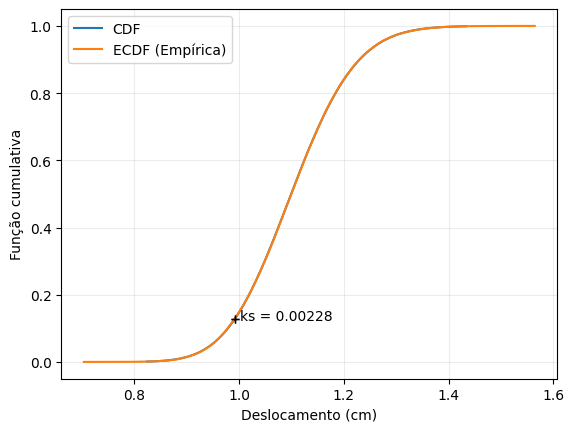

In [82]:
#| label: fig-ks-test
#| fig-cap: Teste de Kolmogorov-Smirnov para a distribuição Lognormal ajustada aos dados.

ecdf = ss.ecdf(delta_C_values).cdf

ks_test_value, x_ks_value = calculate_ks_test(delta_C_values, ecdf, ss.lognorm, s=s, loc=loc, scale=scale)
plot_ks_test(
    ecdf,
    ss.lognorm,
    x_ks_value,
    ks_test_value,
    s=s,
    loc=loc,
    scale=scale,
    xytext=(x_ks_value + 0.01, ecdf.evaluate(x_ks_value) - 0.005),
)

Na tabela abaixo são comparados os valores obtidos com a implementação desenvolvida com os obtidos por meio da função `kstest`.

In [83]:
import pandas as pd


ks_res_lognormal = ss.kstest(delta_C_values, "lognorm", args=(s, loc, scale))

df_ks_gauss = pd.DataFrame(
    [
        {"ks": ks_test_value, "Location": x_ks_value},
        {"ks": ks_res_lognormal.statistic, "Location": ks_res_lognormal.statistic_location},
    ]
)
df_ks_gauss.index = ["Manual", "Scipy"]
df_ks_gauss

,ks,Location
Manual,0.002277,0.991496
Scipy,0.002284,0.991493


Considerando um nível de significância ($\alpha$) de 5%, podemos calcular o valor crítico do teste.

In [84]:
#| code-fold: false
ks_critical_value = 1.36 / np.sqrt(SIZE)
ks_critical_value

0.006082104898799429

Uma vez que o valor calculado (**0,0023**) foi menor que o crítico (**0,0061**), verificamos que, para esse nível de significância, podemos admitir que os dados testados são originados do modelo Lognormal.

# Questão 3

A função densidade de probabilidade (PDF) de uma v.a. $X$ é dada pela equação a seguir.

Se o seu valor esperado $E[X]$ vale 0,6, calcular o valor de $a$ e $b$.

$$
f(x) = 
    \left\{\begin{array}{lr}
        a + bx^{2}, & \textrm{ se } 0 \leq x \leq 1 \\
        0, & \textrm{ para demais valores de } x
    \end{array}\right.
$$

## Resolução

Para obter os valores de $a$ e $b$, podemos primeiramente utilizar a propriedade de uma função densidade de probabilidade:

$$
\int_{-\infty}^{\infty} f(x) \, dx = 1
$$

Aplicando essa propriedade, obtemos:

$$
\int_{-\infty}^{0} 0 \, dx + \int_{0}^{1} (a + bx^{2}) \, dx + \int_{1}^{\infty} 0 \, dx = 1
$$

Resolvendo as integrais, obtemos:

$$
a + \dfrac{1}{3} b = 1
$$

Utilizaremos agora a informação do valor esperado:

$$
E[X] = \int_{-\infty}^{\infty} xf(x) \, dx = 0{,}6
$$

$$
\int_{-\infty}^{0} x \cdot 0 \, dx + \int_{0}^{1} x \cdot (a + bx^{2}) \, dx + \int_{1}^{\infty} x \cdot 0 \, dx = 0{,}6
$$

$$
\int_{0}^{1} (ax + bx^{3}) \, dx = 0{,}6
$$

Resolvendo a integral, obtemos:

$$
\dfrac{1}{2} a + \dfrac{1}{4} b = 0{,}6
$$

Dessa forma, escreve-se o seguinte sistema de equações lineares:

$$
\left\{\begin{array}{lr}
    a + \dfrac{1}{3} b = 1 \\
    \dfrac{1}{2} a + \dfrac{1}{4} b = 0{,}6
\end{array}\right.
$$


No trecho de código abaixo utilizando a linguagem de programação [Python](https://www.python.org/) e a biblioteca [NumPy](https://numpy.org/), resolvemos o sistema linear.

In [85]:
#| code-fold: false
import numpy as np

result = np.linalg.solve(
    np.array([
        [1, 1/3],
        [1/2, 1/4]
    ]),
    np.array([1, 0.6])
)
result

array([0.6, 1.2])

Portanto, obtemos

$$a=0{,}6$$
$$b=1{,}2$$

Sendo assim, a PDF pode ser escrita como:

$$
f(x) = 
    \left\{\begin{array}{lr}
        0{,}6 + 1{,}2x^{2}, & \textrm{ se } 0 \leq x \leq 1 \\
        0, & \textrm{ para demais valores de } x
    \end{array}\right.
$$

Note que a propriedade da PDF $f(x) \geq 0$ foi atendida para os valores de $a$ e $b$ calculados.

# Questão 4

Seja a equação de resistência à pressão interna ($P_{i}$) de um cilindro de parede fina, conhecida como Equação de Barlow, dada por $P_{i} = \dfrac{2 Y_{p} t}{D}$, na qual $Y_{p}$ é a tensão de escoamento do material, $D$ e $t$ representam o diâmetro externo e a espessura do tubo, respectivamente. Assumindo-se os parâmetros e distribuições da tabela abaixo, pede-se:

| **Variável**  | **Média** | **COV** | **Distribuição** |
|---------------|-----------|---------|:----------------:|
| $Y_{p}$ (psi) | 96800     | 0,0531  |      Normal      |
| $D$ (pol)     | 10,8263   | 0,0019  |     Lognormal    |
| $t$ (pol)     | 0,8024    | 0,0217  |      Normal      |

a) Traçar as PDFs marginais das v.a. $D$ e $t$, e sua PDF conjunta, admitindo-as independentes;

b) Estimar o valor médio e a variância de $P_{i}$, por expansão em série de Taylor.

## Resolução

### Item a)

Para ambas as variáveis, temos a média e o coeficiente de variação, para obtermos o valor do desvio padrão basta multiplicarmos o coeficiente de variação pela média.

#### PDFs marginais do Diâmetro (distribuição Lognormal) e Espessura (distribuição normal)

Para obter a PDF da distribuição Lognormal para o caso em que temos a média ($\mu$) e o desvio padrão ($\sigma$) precisamos obter os parâmetros dessa distribuição resolvendo o seguinte sistema:

$$
\left\{\begin{array}{lr}
    \mu \sqrt{e^{\xi^{2}} - 1} = \sigma \\
    e^{\left( \lambda + \dfrac{1}{2} \xi^{2} \right)} = \mu
\end{array}\right.
$$

Analiticamente, obtemos a solução para $\xi$ e $\lambda$ com as seguintes expressões:

$$
\xi = \sqrt{\ln \left( \dfrac{\mu^{2} + \sigma^{2}}{\mu^{2}} \right)}
$$

$$
\lambda = - \dfrac{1}{2} \xi^{2} + \ln(\mu)
$$

Na @fig-plot-marginal-d e @fig-plot-marginal-t são apresentados os gráficos das PDFs marginais do diâmetro e espessura, respectivamente.

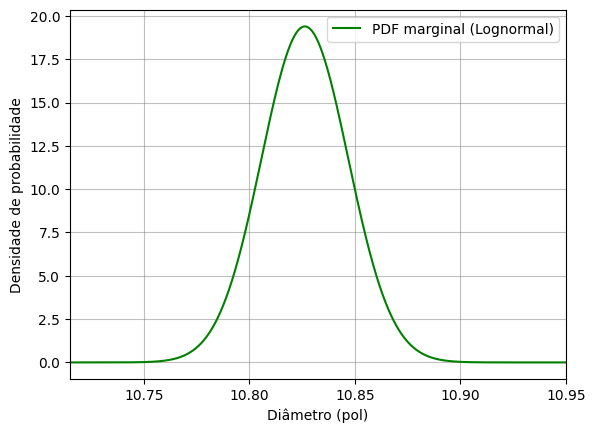

In [86]:
#| label: fig-plot-marginal-d
#| fig-cap: Densidade de probabilidade marginal do diâmetro.

import numpy as np
import matplotlib.pyplot as plt

mean_D = 10.8263
COV_D = 0.0019
std_D = COV_D * mean_D

ksi = np.sqrt(np.log((mean_D**2 + std_D**2)/mean_D**2))
lbd = -0.5 * ksi ** 2 + np.log(mean_D)

def D_lognorm(x):
    return (
        1 / (np.sqrt(2 * np.pi) * ksi * x) * np.exp(-0.5 * ((np.log(x) - lbd) / ksi) ** 2)
    )

xi_D, xf_D = 10.715, 10.950

x_lognorm = np.linspace(xi_D, xf_D, 1000)

fig, ax = plt.subplots()
ax.plot(x_lognorm, D_lognorm(x_lognorm), label="PDF marginal (Lognormal)", color="green")
ax.grid(True, color="gray", alpha=0.5)
ax.legend(loc="best")
ax.set_xlabel("Diâmetro (pol)")
ax.set_ylabel("Densidade de probabilidade")
ax.set_xlim(xi_D, xf_D);

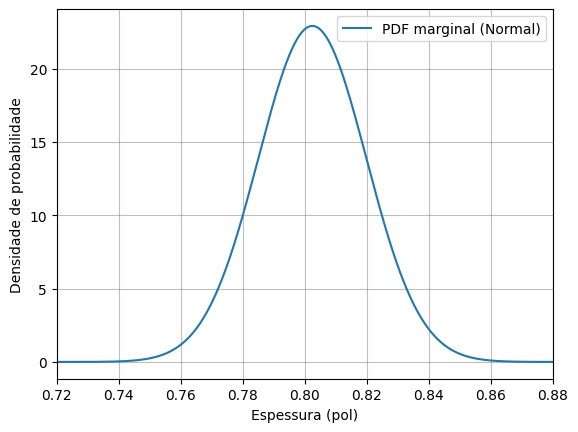

In [87]:
#| label: fig-plot-marginal-t
#| fig-cap: Densidade de probabilidade marginal da espessura.

mean_t = 0.8024
COV_t = 0.0217
std_t = COV_t * mean_t

def t_norm(x):
    return (
        1 / (std_t * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean_t) / std_t) ** 2)
    )

xi_t, xf_t = 0.72, 0.88  

x_norm = np.linspace(xi_t, xf_t, 1000)

fig, ax = plt.subplots()
ax.plot(x_norm, t_norm(x_norm), label="PDF marginal (Normal)")
ax.grid(True, color="gray", alpha=0.5)
ax.legend(loc="best")
ax.set_xlabel("Espessura (pol)")
ax.set_ylabel("Densidade de probabilidade")
ax.set_xlim(xi_t, xf_t);

#### PDF conjunta

Admitindo as variáveis como independentes, a PDF conjunta é obtida pelo produto entre as PDFs marginais.

Na @fig-pdf-conjunta é apresentado o gráfico da PDF conjunta do diâmetro e espessura.

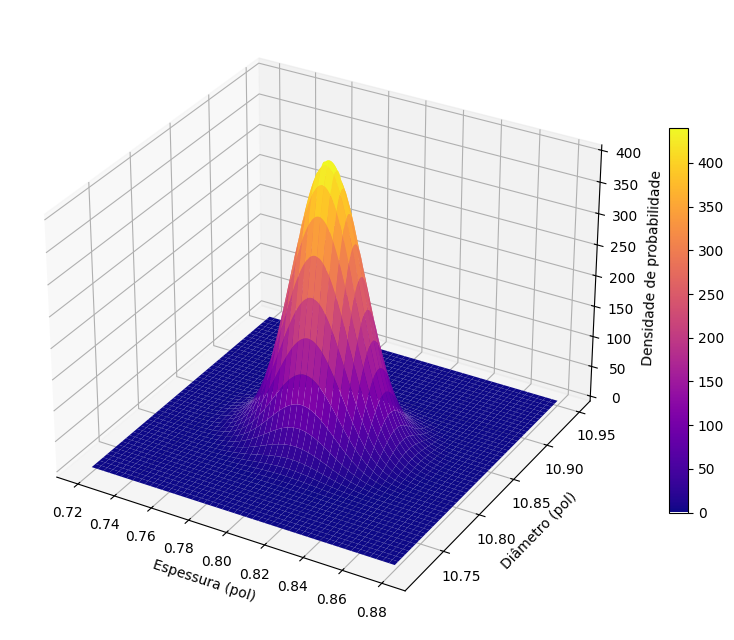

In [88]:
#| label: fig-pdf-conjunta
#| fig-cap: Densidade de probabilidade conjunta do diâmetro e da espessura.

x_norm = np.linspace(xi_t, xf_t, 1000)
x_lognorm = np.linspace(xi_D, xf_D, 1000)

X, Y = np.meshgrid(x_norm, x_lognorm)
Z = t_norm(X) * D_lognorm(Y)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap='plasma')
fig.colorbar(surf, shrink=0.5)
ax.set_xlabel("Espessura (pol)")
ax.set_ylabel("Diâmetro (pol)")
ax.set_zlabel("Densidade de probabilidade")
ax.set_zlim(0, 400);

### Item b)

Seja a função aproximadora

$$
Y = g(Y_{p}, t, D) = \dfrac{2 \cdot Y_{p} \cdot t}{D}
$$

A estimativa do valor médio da pressão interna é dada pelo valor da função aproximadora de $P_{i}$ aplicada nos valores médios das variáveis aleatórias que compõem a função, isto é:

$$
E(P_{i}) \approx g(\mu_{Y_{p}}, \mu_{t}, \mu_{D}) = \dfrac{2 \cdot \mu_{Y_{p}} \cdot \mu_{t}}{\mu_{D}} = \dfrac{2 \cdot 96800 \cdot 0{,}8024}{10{,}8263} = 14348{,}821\, \textrm{psi}
$$

Visto que as variáveis são consideradas independentes, a estimativa da variância é obtida por:

$$
Var(P_{i}) = \sigma_{Y_{p}}^{2} \left ( \dfrac{\partial g}{\partial Y_{p}} \right )^{2} +
    \sigma_{t}^{2} \left ( \dfrac{\partial g}{\partial t} \right )^{2} +
    \sigma_{D}^{2} \left ( \dfrac{\partial g}{\partial D} \right )^{2}
$$

$$
Var(P_{i}) = \sigma_{Y_{p}}^{2} \left ( \dfrac{2 \cdot \mu_{t}}{\mu_{D}} \right )^{2} +
    \sigma_{t}^{2} \left ( \dfrac{2 \cdot \mu_{Y_{p}}}{\mu_{D}} \right )^{2} +
    \sigma_{D}^{2} \left (- \dfrac{2 \cdot \mu_{Y_{p}} \cdot \mu_{t}}{\mu_{D}^{2}} \right )^{2}
$$

$$
Var(P_{i}) = (96800 \cdot 0{,}0531)^{2} \left ( \dfrac{2 \cdot 0{,}8024}{10{,}8263} \right )^{2} +
    (0{,}8024 \cdot 0{,}0217)^{2} \left ( \dfrac{2 \cdot 96800}{10{,}8263} \right )^{2} +
    (10{,}8263 \cdot 0{,}0019)^{2} \left (- \dfrac{2 \cdot 96800 \cdot 0{,}8024}{10{,}8263^{2}} \right )^{2}
$$

$$
Var(P_{i}) = 678219{,}90\, \textrm{psi²}
$$
